# Data analytics for the Business Questions

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [124]:
# df = pd.read_excel("./marketing_data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")
df = pd.read_excel("Threshold_Data.xlsx")

In [125]:
df.shape

(2223, 33)

In [126]:
df.dtypes

Unnamed: 0                       int64
ID                               int64
Year_Birth                       int64
Education                       object
Marital_Status                  object
Income                         float64
Kidhome                          int64
Teenhome                         int64
Dt_Customer                     object
Recency                          int64
MntWines                         int64
MntFruits                        int64
MntMeatProducts                  int64
MntFishProducts                  int64
MntSweetProducts                 int64
MntGoldProds                     int64
NumDealsPurchases                int64
NumWebPurchases                  int64
NumCatalogPurchases              int64
NumStorePurchases                int64
NumWebVisitsMonth                int64
Response                         int64
Complain                         int64
Age                              int64
Total_Spent                      int64
BuyingPower              

In [127]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
Response                 0
Complain                 0
Age                      0
Total_Spent              0
BuyingPower             21
HouseHoldMembers         0
Total_Children           0
TotalPurchases           0
Dt_CustomerConverted     0
SinceEnrolled            0
CLV                      0
AOV                      0
dtype: int64

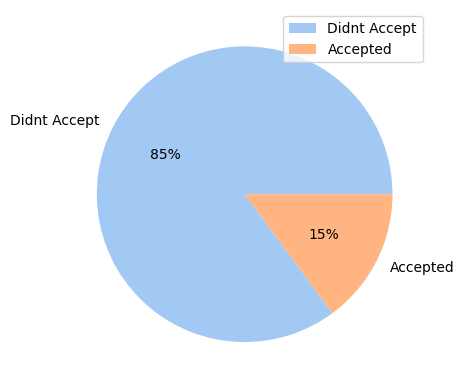

In [128]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

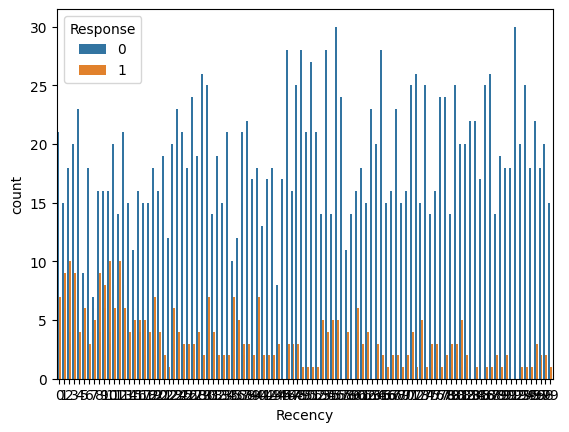

In [129]:
sns.barplot(x = 'Recency', y='count', hue = 'Response',data=df[['Recency', 'Response']].value_counts().reset_index())
plt.show()

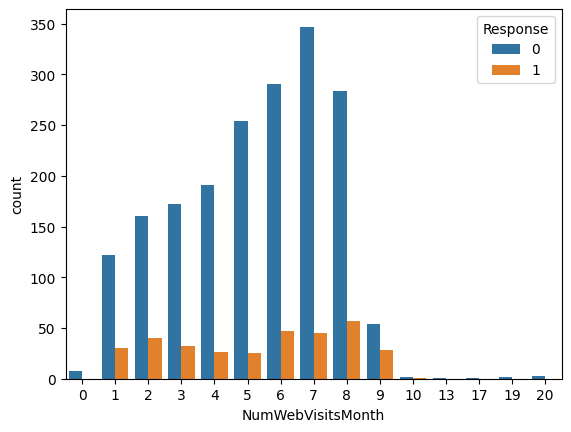

In [130]:
sns.barplot(x = 'NumWebVisitsMonth', y='count', hue = 'Response',data=df[['NumWebVisitsMonth', 'Response']].value_counts().reset_index())
plt.show()

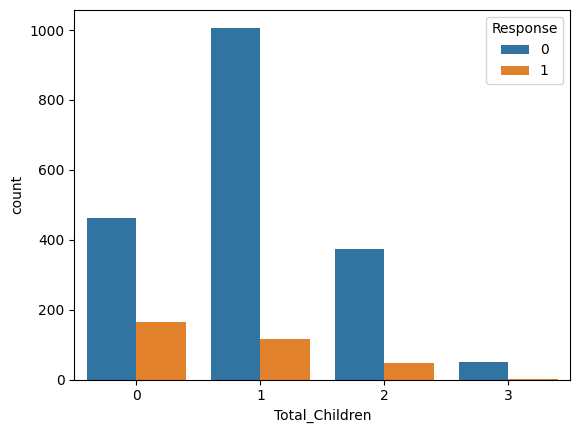

In [131]:
sns.barplot(x = 'Total_Children', y='count', hue = 'Response',data=df[['Total_Children', 'Response']].value_counts().reset_index())
plt.show()

In [132]:
print(df)

      Unnamed: 0     ID  Year_Birth   Education Marital_Status   Income  \
0              0   1826        1970  Graduation         Single  84835.0   
1              1      1        1961  Graduation         Single  57091.0   
2              2  10476        1958  Graduation        Married  67267.0   
3              3   1386        1967  Graduation       Together  32474.0   
4              4   5371        1989  Graduation         Single  21474.0   
...          ...    ...         ...         ...            ...      ...   
2218        2235  10142        1976         PhD         Single  66476.0   
2219        2236   5263        1977     n_cycle        Married  31056.0   
2220        2237     22        1976  Graduation         Single  46310.0   
2221        2238    528        1978  Graduation        Married  65819.0   
2222        2239   4070        1969         PhD        Married  94871.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  Age  Total_Spent  \
0           0         0  201

In [133]:
df['Total_Children'] = df.loc[:, 'Kidhome'] + df.loc[:, 'Teenhome']
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Age,Total_Spent,BuyingPower,HouseHoldMembers,Total_Children,TotalPurchases,Dt_CustomerConverted,SinceEnrolled,CLV,AOV
0,0,1826,1970,Graduation,Single,84835.0,0,0,2014-06-16,0,...,54,1190,84240.0,1,0,15,2014-06-16,3541,5772.315068,79.333333
1,1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,...,63,577,56802.5,1,0,18,2014-06-15,3542,2799.635616,32.055556
2,2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,...,66,251,67141.5,3,1,11,2014-05-13,3575,1229.212329,22.818182
3,3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,...,57,11,32468.5,4,2,4,2014-11-05,3399,51.217808,2.750000
4,4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,...,35,91,21428.5,2,1,8,2014-08-04,3492,435.304110,11.375000


<BarContainer object of 2223 artists>

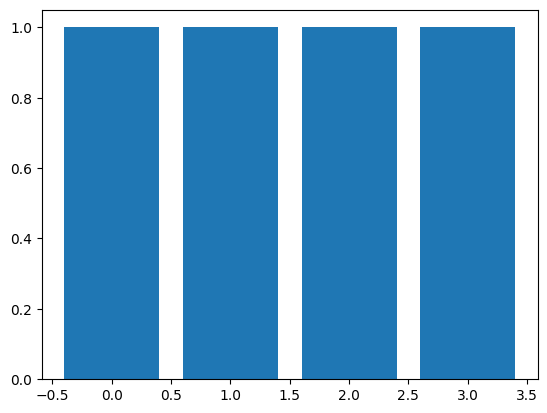

In [134]:
plt.bar(df['Total_Children'], df['Response'])

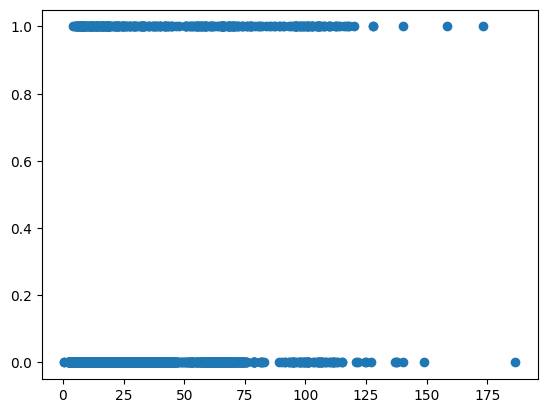

In [135]:
plt.scatter(df['AOV'], df['Response'])

In [136]:
df['Education'].unique()

array(['Graduation', 'PhD', 'n_cycle', 'Master', 'Basic'], dtype=object)

In [137]:
max_float64_value = np.finfo(df['AOV']).max
print(max_float64_value)

1.7976931348623157e+308
